# **Primera Preentrega**
## Julián Reyes Varela
### Data Science I: Fundamentos para la Ciencia de Datos. CODERHOUSE.

Marzo de 2024


## 1) Abstract

La pregunta qué orienta la pre-entrega puede definirse de esta forma: ¿qué factores son determinantes en el éxito de un libro?

En función del dataset seleccionado, se define el éxito del libro a partir de dos variables: el puntaje promedio obtenido por el libro en ratings realizados por críticos o público en general (variable "Book_average_rating") y la cantidad de unidades vendidas (variable "units sold"). De esta forma, se toman en cuenta tanto una dimensión comercial como una que concierne a la calidad literaria de los libros, para considerar su éxito.

Los factores explicativos seleccionados para esta indagación son dos: el prestigio del autor y el género de los libros. Se explorará, entonces, la relación entre estas variables explicativas ("Author_Rating" y "genre") con las variables de éxito del libro ("Book_average_rating" y "units sold").

Luego de este resumen, en el siguiente apartado se ejecutan los códigos necesarios para el trabajo en este cuaderno y se prepara el dataset. En el tercer apartado se aborda el análisis en cuatro etapas: análisis univariado de cada variable involucrada, análisis bivariado para explicar "Book_average_rating", análisis bivariado para explicar "units sold", y análisis multivariado. Finalmente, el trabajo se cierra con un apartado de conclusiones que sintetiza los principales insights.

## 2) Preparación del cuaderno y del dataset

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/'

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [3]:
dfreyes=pd.read_csv('Books_Data_Clean.csv', sep=",")

Se seleccionó el dataset "Book Sales and Rating", de Josh Murrey, publicado en Kaggle: https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings

El dataset consiste en una base de 1070 filas (libros) y 15 columnas o variables, que permiten testear hipótesis respecto de las preguntas planteadas en el abstract de este trabajo.

In [4]:
dfreyes

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.50,7462.500,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1065,2014.0,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106
1066,1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106
1067,1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1068,1068,2011.0,Night Road,Kristin Hannah,en-US,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106


De acuerdo a la siguienta tabla, no hay valores perdidos en las variables que nos interesan.

In [5]:
dfreyes.isna().sum()

index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

## 3) Análisis y visualizaciones

### 3.1) Análisis univariado. Descripción de las variables involucradas

En este apartado se describen sintéticamente las cuatro variables involucradas en el estudio.

En el caso de "units sold" y "Book_average_rating", las variables dependientes, se trata de variables cuantitativas continuas; mientras que "Autor_Rating" y "genre" son cualitativas o cagóricas: una ordinal y otra nominal.

Comencemos la descripción con "Book_average_rating".

Descripción de 'Book_average_rating': count    1070.000000
mean        4.007000
std         0.247244
min         2.970000
25%         3.850000
50%         4.015000
75%         4.170000
max         4.770000
Name: Book_average_rating, dtype: float64 



Text(0, 0.5, 'Frecuencia')

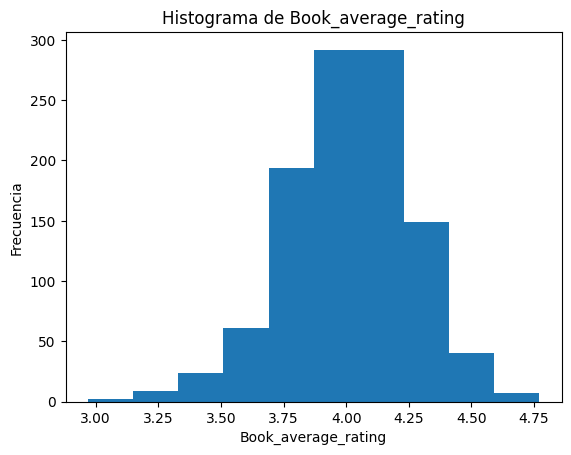

In [6]:
print("Descripción de 'Book_average_rating':", dfreyes["Book_average_rating"].describe(), "\n")

plt.hist(dfreyes['Book_average_rating'], bins=10)
plt.title('Histograma de Book_average_rating')
plt.xlabel('Book_average_rating')
plt.ylabel('Frecuencia')

El histograma de Book_average_rating da cuenta de una distribución aproximadamente normal, coincidiendo su media y su mediana en el entorno al 4.01. No hay valores inferiores al 2.97, y ningún libro supera el 4.77, su valor máximo. El comportamiento de la variable es muy diferente al de "units sold", que se presenta a continuación.


Descripción de 'units sold': count     1070.000000
mean      9676.980374
std      15370.571306
min        106.000000
25%        551.250000
50%       3924.000000
75%       5312.250000
max      61560.000000
Name: units sold, dtype: float64 



Text(0, 0.5, 'Frecuencia')

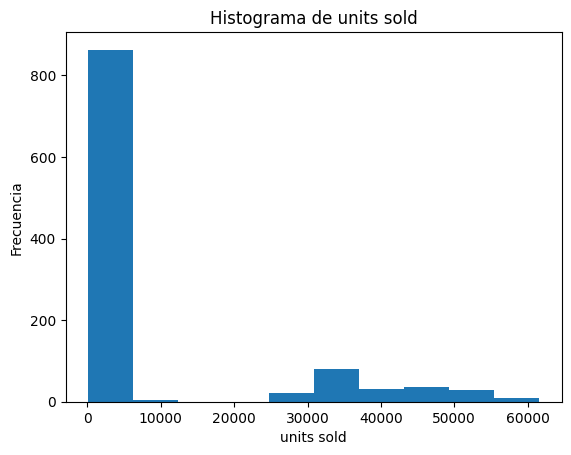

In [7]:
print("Descripción de 'units sold':", dfreyes['units sold'].describe(), "\n")

plt.hist(dfreyes['units sold'], bins=10)
plt.title('Histograma de units sold')
plt.xlabel('units sold')
plt.ylabel('Frecuencia')

En este caso, la distribución no es normal, habiendo una fuerte concentración de casos en la primera columna y muy pocos en las restantes. Esto se refleja en una media casi cuatro veces mayor que la mediana. El 75% de los libros venden menos que 5312 unidades, mientras que la media, sensible a valores extremos,  es de 9676 unidades. La mayoría de los valores se encuentran distantes del promedio, con un desvío estandard de 15371 unidades. El máximo es de 61560 unidades.

Las dos siguientes variables categóricas muestran diferencias importantes en la frecuencia de cada categoría. En el caso de "Author_Rating", la gran mayoría de casos se concentra en la categoría "Intermediate", habiendo muy pocos en las categorías "Novice" y "Famous". Esto supone una dificultad para nuestro análisis, al igual que el comportamiento de la variable "genre": hay más de 800 libros de ficción y menos de 200 libros infantiles y de no-ficción.


Descripción de 'Author_Rating': count             1070
unique               4
top       Intermediate
freq               625
Name: Author_Rating, dtype: object 

Categorías y frecuencias: Intermediate    625
Excellent       362
Famous           53
Novice           30
Name: Author_Rating, dtype: int64


Text(0, 0.5, 'Frecuencia')

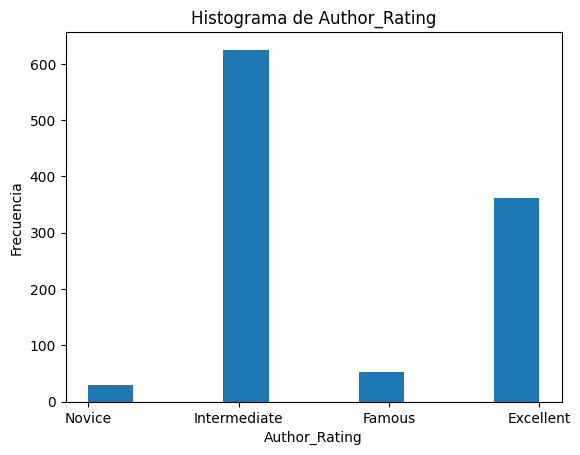

In [8]:
print("Descripción de 'Author_Rating':", dfreyes["Author_Rating"].describe(), "\n")
print ("Categorías y frecuencias:",dfreyes['Author_Rating'].value_counts())

plt.hist(dfreyes['Author_Rating'], bins=10)
plt.title('Histograma de Author_Rating')
plt.xlabel('Author_Rating')
plt.ylabel('Frecuencia')

Descripción de 'genre': count              1070
unique                4
top       genre fiction
freq                822
Name: genre, dtype: object 

Categorías y frecuencias: genre fiction    822
nonfiction       171
fiction           62
children          15
Name: genre, dtype: int64


Text(0, 0.5, 'Frecuencia')

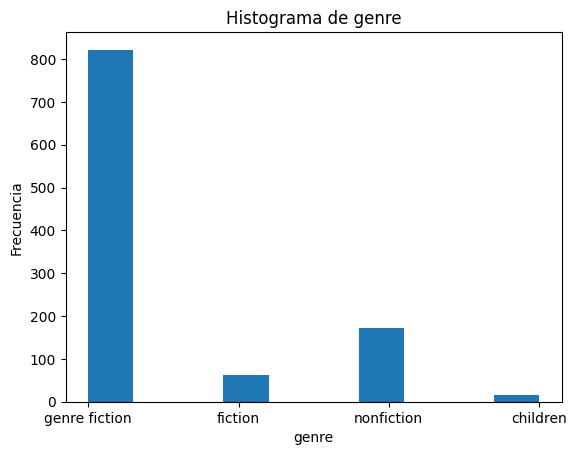

In [9]:
print("Descripción de 'genre':", dfreyes["genre"].describe(), "\n")
print ("Categorías y frecuencias:",dfreyes['genre'].value_counts())

plt.hist(dfreyes['genre'], bins=10)
plt.title('Histograma de genre')
plt.xlabel('genre')
plt.ylabel('Frecuencia')

En el caso de esta variable, encontramos que dos categorías refieren a lo mismo ("genre fiction" y "fiction"), por lo que procedemos a unificarlas en una misma categoría mediante el siguiente código:

In [10]:
dfreyes['genre'] = dfreyes['genre'].replace('genre fiction', 'fiction')

Text(0, 0.5, 'Frecuencia')

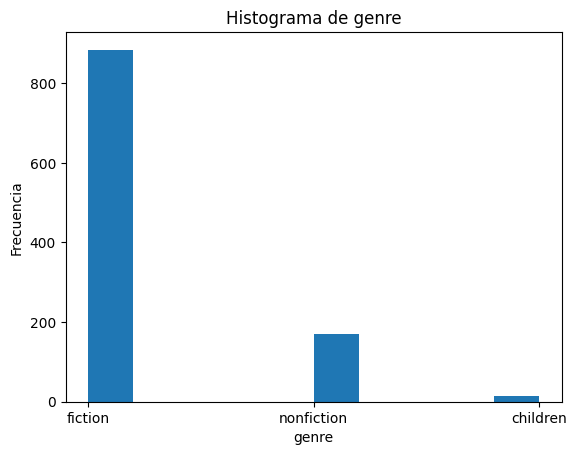

In [11]:
plt.hist(dfreyes['genre'], bins=10)
plt.title('Histograma de genre')
plt.xlabel('genre')
plt.ylabel('Frecuencia')

### 3.2) Análisis bivariado para explicar la variable "Book_average_rating"



Comenzamos este apartado visualizando las diferencias en la variable "Book_average_rating" a partir del género y el prestigio del autor, mediante gráficos de caja. Podemos ver que no se visualizan diferencias importantes en el primer caso, aunque sí una mayor centralidad en los valores de los ratings en el caso de los libros infantiles, y una mayor dispersión de la variable en las otras dos categorías, que además presentan varios valores atípicos.

<Axes: xlabel='Book_average_rating', ylabel='genre'>

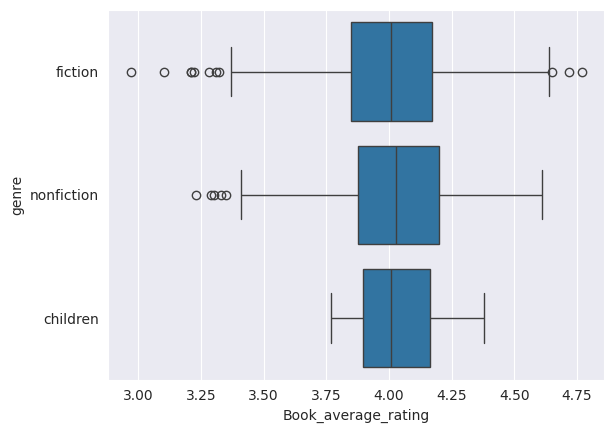

In [12]:
sns.set_style("darkgrid")
sns.boxplot(data=dfreyes, x="Book_average_rating", y="genre")

Al analizar el comportamiento de la misma variable dependiente a partir del prestigio del autor, sí se visualizan diferencias relevantes para nuestro trabajo.

<Axes: xlabel='Book_average_rating', ylabel='Author_Rating'>

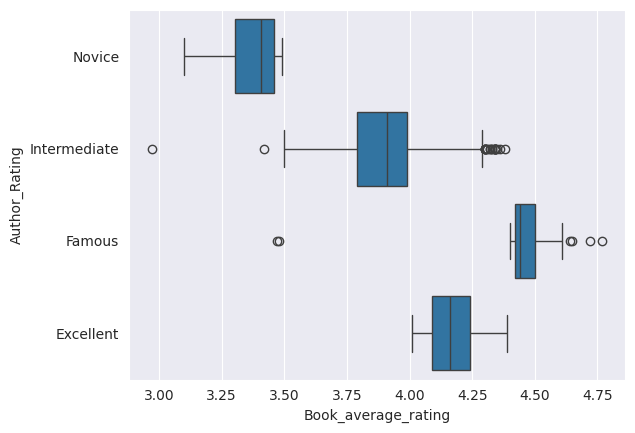

In [13]:
sns.boxplot(data=dfreyes, x="Book_average_rating", y="Author_Rating")

En este caso, se percibe que los libros de autores famosos tienen mejores ratings promedios que las otras categorías, y son particularmente bajos los de los principiantes. Para poner a prueba este análisis tentativo, someteremos a la prueba t de Student la diferencia de medias entre los grupos de libros.



In [14]:
from scipy import stats

novice = dfreyes.loc[dfreyes['Author_Rating'] == 'Novice', 'Book_average_rating']
intermediate = dfreyes.loc[dfreyes['Author_Rating'] == 'Intermediate', 'Book_average_rating']
famous = dfreyes.loc[dfreyes['Author_Rating'] == 'Famous', 'Book_average_rating']
excellent = dfreyes.loc[dfreyes['Author_Rating'] == 'Excellent', 'Book_average_rating']

statistic, pvalue = stats.ttest_ind(famous,excellent, equal_var=False)
print('Prueba t entre Famous y Excellent: ',round(statistic,2),'p-valor:', round(pvalue,2))

statistic, pvalue = stats.ttest_ind(excellent,intermediate, equal_var=False)
print('Prueba t entre Excellent e Intermediate: ',round(statistic,2),'p-valor:', round(pvalue,2))

statistic, pvalue = stats.ttest_ind(intermediate,novice, equal_var=False)
print('Prueba t entre Intermediate y Novice: ',round(statistic,2),'p-valor:', round(pvalue,2))

statistic, pvalue = stats.ttest_ind(excellent,novice, equal_var=False)
print('Prueba t entre Excellent y Novice: ',round(statistic,2),'p-valor:', round(pvalue,2))

statistic, pvalue = stats.ttest_ind(famous,novice, equal_var=False)
print('Prueba t entre Famous y Novice: ',round(statistic,2),'p-valor:', round(pvalue,2))

statistic, pvalue = stats.ttest_ind(famous,intermediate, equal_var=False)
print('Prueba t entre Famous e Intemediate: ',round(statistic,2),'p-valor:', round(pvalue,2))

Prueba t entre Famous y Excellent:  9.31 p-valor: 0.0
Prueba t entre Excellent e Intermediate:  28.3 p-valor: 0.0
Prueba t entre Intermediate y Novice:  26.72 p-valor: 0.0
Prueba t entre Excellent y Novice:  40.95 p-valor: 0.0
Prueba t entre Famous y Novice:  31.12 p-valor: 0.0
Prueba t entre Famous e Intemediate:  17.83 p-valor: 0.0


El p-valor en 0.0 nos indica la improbabilidad de la hipótesis nula y nos confirma la significatividad de las diferencias observadas en la variable Book_average_rating a partir de las distintas categorías de "Author_Rating".

### 3.3) Análisis bivariado para explicar la variable "units sold"

En este apartado replicaremos la exploración pero respecto a la otra variable dependiente: units sold, a partir de los mismos predictores (genre y Author_rating).

<Axes: xlabel='units sold', ylabel='genre'>

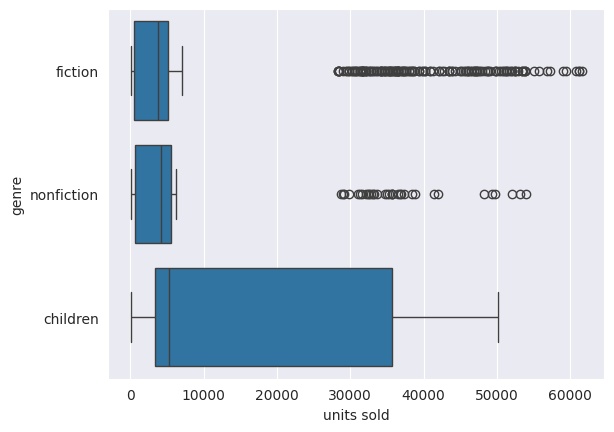

In [15]:
sns.boxplot(data=dfreyes, x="units sold", y="genre")

En este caso, no se aprecian diferencias entre ficción y no-ficción, más allá de la mayor cantidad de outliers en el primer caso (probablemente asociado a la mayor frecuencia de la categoría). La caja de "children" tiene una zona compartida con las otras dos, aunque es notoriamente mayor su rango intercuartil, con una gran cantidad de casos en el tercer cuartil. De todas formas, su mediana no está muy alejada de la de las otras cajas. La diferente distribución puede vincularse con la baja frecuencia de la categoría: solo hay 15 casos, frente a 171 de nonfiction y 884 de fiction.

La visualización nos sugiere que no hay diferencias importantes entre los tres grupos, y lo confirmamos mediante tres pruebas t de Student.

In [16]:
fiction = dfreyes.loc[dfreyes['genre'] == 'fiction', 'Book_average_rating']
nonfiction = dfreyes.loc[dfreyes['genre'] == 'nonfiction', 'Book_average_rating']
children= dfreyes.loc[dfreyes['genre'] == 'children', 'Book_average_rating']

statistic, pvalue = stats.ttest_ind(fiction,nonfiction, equal_var=False)
print('Prueba t entre fiction y nonfiction: ',round(statistic,2),'p-valor:', round(pvalue,2))

statistic, pvalue = stats.ttest_ind(fiction,children, equal_var=False)
print('Prueba t entre fiction y children: ',round(statistic,2),'p-valor:', round(pvalue,2))

statistic, pvalue = stats.ttest_ind(nonfiction,children, equal_var=False)
print('Prueba t entre nonfiction y children: ',round(statistic,2),'p-valor:', round(pvalue,2))


Prueba t entre fiction y nonfiction:  -0.87 p-valor: 0.39
Prueba t entre fiction y children:  -0.59 p-valor: 0.57
Prueba t entre nonfiction y children:  -0.2 p-valor: 0.85


En los tres casos, el estadístico fue cercano a 0 y el valor p muy alto, por lo que no podemos rechazar la hipótesis nula.

Por último, consideramos el efecto de la variable "Author_Rating" en la cantidad de unidades vendidas. La visualización permite considerar la hipótesis de que el pretigio de excelencia impulsa la venta de libros; mientras que no parecen vender menos los novatos o intermedios respecto de los famosos.

<Axes: xlabel='units sold', ylabel='Author_Rating'>

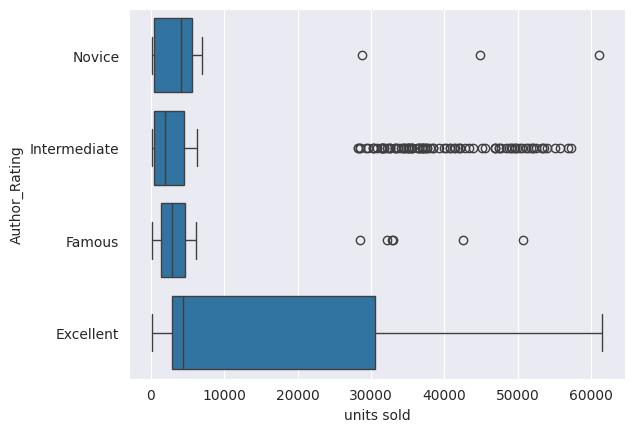

In [17]:
sns.boxplot(data=dfreyes, x="units sold", y="Author_Rating")

Para confirmar la hipótesis, testeamos la diferencia de media entre los grupos.

In [18]:
novice = dfreyes.loc[dfreyes['Author_Rating'] == 'Novice', 'units sold']
intermediate = dfreyes.loc[dfreyes['Author_Rating'] == 'Intermediate', 'units sold']
famous = dfreyes.loc[dfreyes['Author_Rating'] == 'Famous', 'units sold']
excellent = dfreyes.loc[dfreyes['Author_Rating'] == 'Excellent', 'units sold']

statistic, pvalue = stats.ttest_ind(famous,excellent, equal_var=False)
print('Prueba t entre Famous y Excellent: ',round(statistic,2),'p-valor:', round(pvalue,2))

statistic, pvalue = stats.ttest_ind(excellent,intermediate, equal_var=False)
print('Prueba t entre Excellent e Intermediate: ',round(statistic,2),'p-valor:', round(pvalue,2))

statistic, pvalue = stats.ttest_ind(excellent,famous, equal_var=False)
print('Prueba t entre Excellent e Famous: ',round(statistic,2),'p-valor:', round(pvalue,2))

statistic, pvalue = stats.ttest_ind(intermediate,novice, equal_var=False)
print('Prueba t entre Intermediate y Novice: ',round(statistic,2),'p-valor:', round(pvalue,2))

statistic, pvalue = stats.ttest_ind(famous,novice, equal_var=False)
print('Prueba t entre Famous y Novice: ',round(statistic,2),'p-valor:', round(pvalue,2))

statistic, pvalue = stats.ttest_ind(famous,intermediate, equal_var=False)
print('Prueba t entre Famous e Intemediate: ',round(statistic,2),'p-valor:', round(pvalue,2))

Prueba t entre Famous y Excellent:  -3.76 p-valor: 0.0
Prueba t entre Excellent e Intermediate:  5.06 p-valor: 0.0
Prueba t entre Excellent e Famous:  3.76 p-valor: 0.0
Prueba t entre Intermediate y Novice:  0.33 p-valor: 0.74
Prueba t entre Famous y Novice:  -0.17 p-valor: 0.87
Prueba t entre Famous e Intemediate:  -0.81 p-valor: 0.42


A partir de las Pruebas t, confirmamos que solo son significativas las diferencias de medias que mantiene el grupo "Excellent" con todos los demás, y no lo son las que mantienen estos otros grupos entre sí.

### 3.4) Análisis multivariado

En este último apartado de análisis y visualización, se presenta la visualización, trivariada, de la distribución de cada variable dependiente en función de las dos variables explicativas.

<ipython-input-19-8c76d0c41172>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dfreyes, x='Author_Rating', y='units sold', hue='genre', ci=None)


<Axes: xlabel='Author_Rating', ylabel='units sold'>

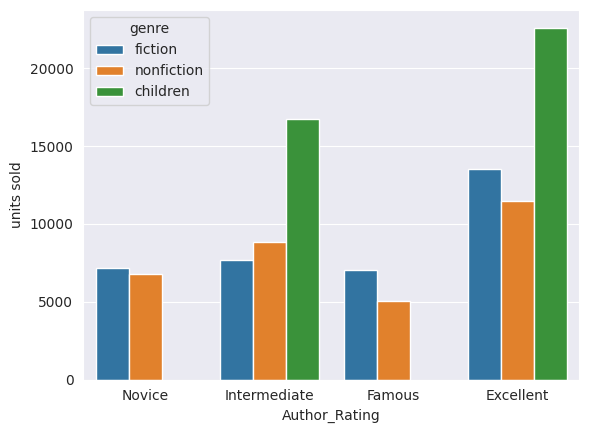

In [19]:
sns.barplot(data=dfreyes, x='Author_Rating', y='units sold', hue='genre', ci=None)

Aquí se visualiza el efecto del prestigio excelente en la cantidad de ventas; la media de esta categoría es sensiblemente mayor que las otras en los tres géneros, si bien parte de esta diferencia se debe a los libros infantiles. La diferencia de este grupo con los otros no fue significativa en nuestro test, probablemente por la pequeña magnitud de la submuestra.

<ipython-input-20-0fe12fc84b1c>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=dfreyes, x='Author_Rating', y='Book_average_rating', hue='genre', ci=None)


<Axes: xlabel='Author_Rating', ylabel='Book_average_rating'>

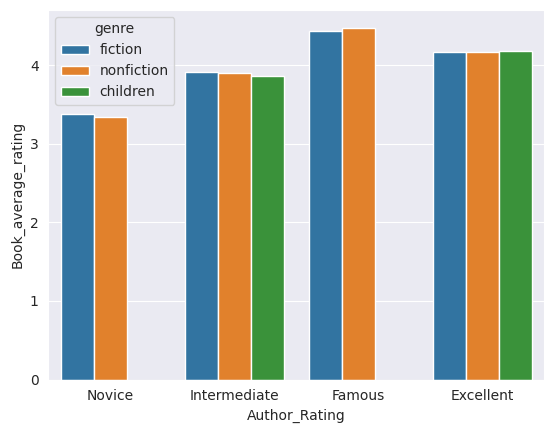

In [20]:
sns.barplot(data=dfreyes, x='Author_Rating', y='Book_average_rating', hue='genre', ci=None)

Respecto al rating promedio de los libros, puede verse la elevación de la media en el caso de los autores famosos para los géneros ficción y no ficción, que se había comentado anteriormente. Si bien el promedio es menor en el caso de los principiantes, la diferencia con los otros grupos no fue significativa según la prueba t. Para ninguno de los cuatro grupos son visiblimente diferentes las medias de acuerdo al género de los libros.



## 4) Síntesis con pricipales insights

Como cierre de este trabajo, se sintetizan los principales insights arrojados por el análisis precedente.

En primer lugar, se observó que **la categoría "excelente" en el prestigio del autor de un libro sí tiene un impacto positivo en el número de unidades vendidas**. Como podía asumirse, los lectores están más inclinados a comprar obras de autores con un prestigio destacado. Sin embargo, no se detectaron diferencias significativas entre los otros tres grupos (principiantes, intermedios y famosos).

Por otro lado, **el género del libro no parece influir en la cantidad de unidades vendidas**. Al menos en el marco de esta muestra, los datos no indican que los consumidores basen sus decisiones en el género literario.

**Respecto de la calidad literaria de los libros**, considerada a través del rating medio, se observa nuevamente que **sí impacta el prestigio del autor y no el género**. Sin embargo, en este caso **el rating medio es mayor en la categoría "famoso"** que en las demás, incluso que la categoría "excelente". Si bien esto puede ser objeto de próximas indagaciones, puede hipotetizarse que en el caso de los autores excelentes las expectativas pueden ser mayores, y que esto hace disminuir el rating de sus obras.

Finalmente, resta recomendar que, para futuros análisis, sería beneficioso trabajar con una muestra más amplia. En particular, sería útil contar con una mayor muestra de libros de los géneros infantil y no-ficción, así como de libros con autores famosos y principiantes. Estas mejoras permitirían obtener resultados más robustos y representativos del mercado editorial.